In [1]:
# -*- coding: utf-8 -*-

import time

import numpy as np
import pandas as pd
#import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

save_folder = './sem_processamento/'

In [2]:
df = pd.read_csv('haberman.data', header = None)
df.columns = ['age', 'year', 'positive_axillary_nodes', 'survival_status']

print(df.shape) # (306, 4)
df.describe().to_excel(save_folder + 'describe.xlsx')
print(df.describe())

(306, 4)
              age        year  positive_axillary_nodes  survival_status
count  306.000000  306.000000               306.000000       306.000000
mean    52.457516   62.852941                 4.026144         1.264706
std     10.803452    3.249405                 7.189654         0.441899
min     30.000000   58.000000                 0.000000         1.000000
25%     44.000000   60.000000                 0.000000         1.000000
50%     52.000000   63.000000                 1.000000         1.000000
75%     60.750000   65.750000                 4.000000         2.000000
max     83.000000   69.000000                52.000000         2.000000


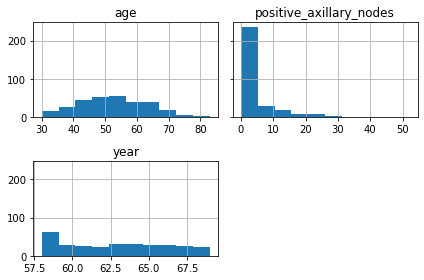

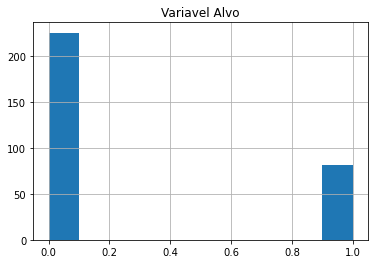

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y - 1

X.hist(sharey=True)
plt.title('Variaveis de Entrada')
plt.tight_layout()
plt.xlim(0, 100)
plt.savefig(save_folder + 'X_hist.png')
plt.show()

y.hist()
plt.title('Variavel Alvo')
plt.savefig(save_folder + 'y_hist.png')
plt.show()

In [4]:
print(df['survival_status'].value_counts())

1    225
2     81
Name: survival_status, dtype: int64


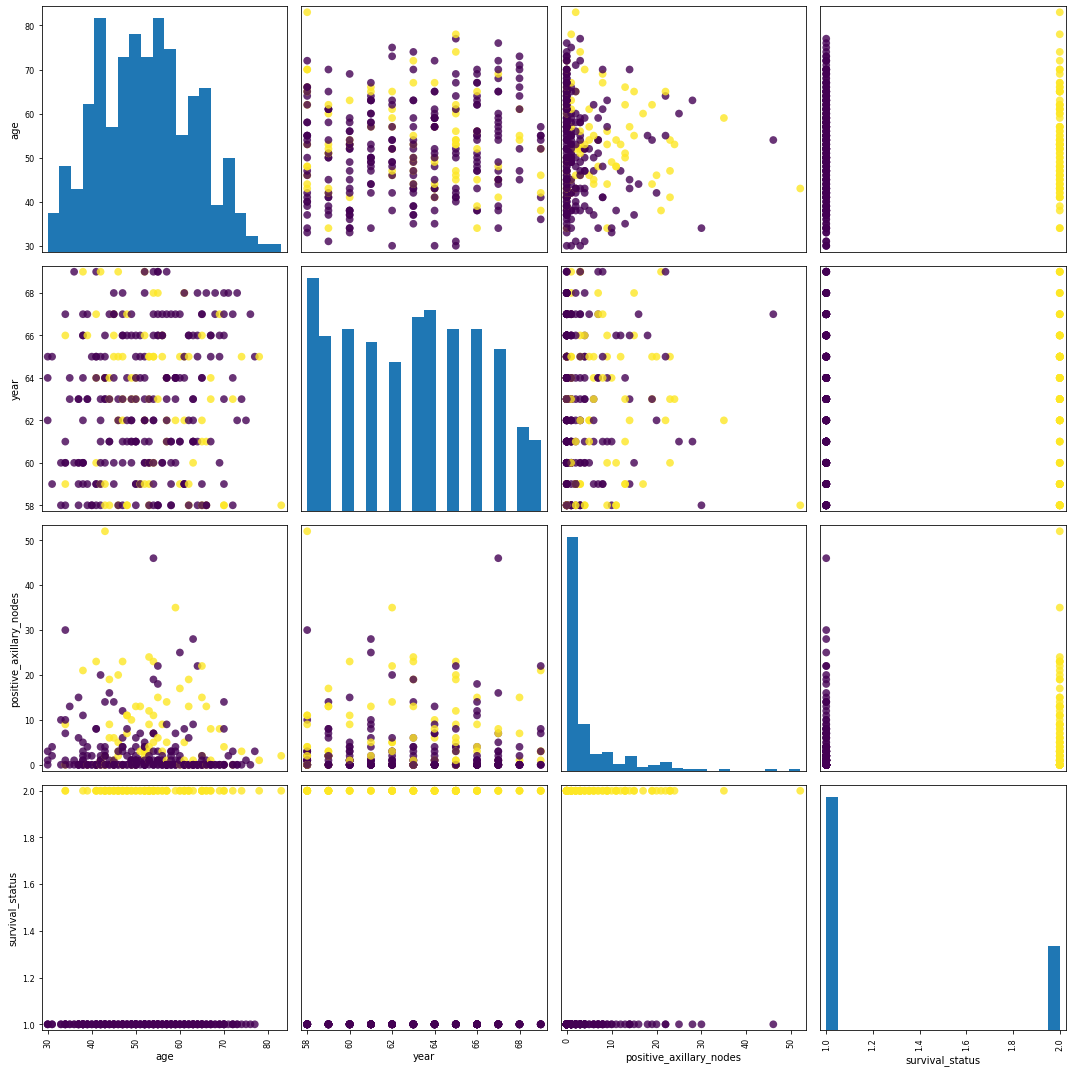

In [5]:
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.tight_layout()
plt.savefig(save_folder + 'scatter_plot.png')
plt.show()

In [6]:
np.random.seed(int(time.time()))
k_values = np.arange(5, 200, 20)

In [7]:
scores = []
for k in k_values:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        accs.append(knn.score(X_test, y_test))
        
    scores.append(accs)


In [22]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

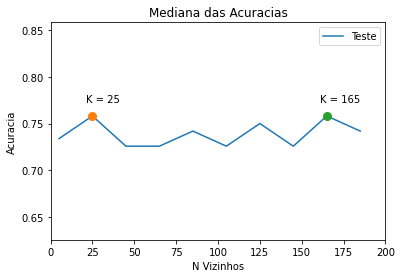

In [24]:
plt.plot(k_values, medians)
plt.plot(k_values[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(k_values[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 200)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(k_values[max1]), (k_values[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(k_values[max2]), (k_values[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('N Vizinhos')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors = k_values[max1])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_mat = pd.crosstab(y_test, y_pred)
print(conf_mat)

conf_mat.to_excel(save_folder + 'conf_matrix.xlsx')

col_0             0  1
survival_status       
0                45  3
1                12  2


# PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

save_folder = './com_pca/'

n_comps = 2

X = StandardScaler().fit_transform(X)
pca = PCA(n_components = n_comps)

X = pca.fit_transform(X)

df_X = pd.DataFrame(X)
print(df_X.describe())

                  0             1
count  3.060000e+02  3.060000e+02
mean   1.857628e-16 -2.539726e-17
std    1.055942e+00  9.998604e-01
min   -2.503637e+00 -1.336894e+00
25%   -6.631953e-01 -7.743523e-01
50%    9.907102e-03 -1.348652e-01
75%    6.548567e-01  4.159343e-01
max    4.268923e+00  5.517063e+00


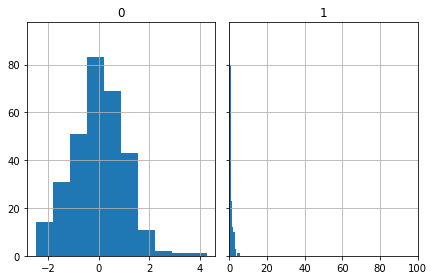

In [27]:
df_X.hist(sharey=True)
plt.tight_layout()
plt.xlim(0, 100)
plt.savefig(save_folder + 'X_hist.png')
plt.show()

In [28]:
scores = []
for k in k_values:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        accs.append(knn.score(X_test, y_test))
        
    scores.append(accs)

In [29]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

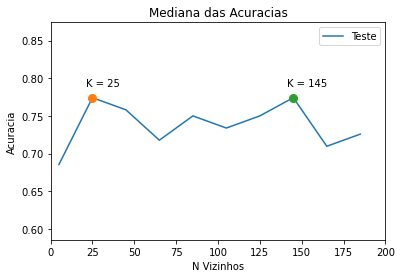

In [30]:
plt.plot(k_values, medians)
plt.plot(k_values[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(k_values[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 200)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(k_values[max1]), (k_values[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(k_values[max2]), (k_values[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('N Vizinhos')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors = k_values[max1])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_mat = pd.crosstab(y_test, y_pred)
print(conf_mat)

conf_mat.to_excel(save_folder + 'conf_matrix.xlsx')

col_0             0  1
survival_status       
0                41  4
1                15  2
